In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import mpl_finance as mpf
from matplotlib.pylab import date2num
sns.set_style(style="whitegrid")
sns.set_color_codes()
import yfinance as yf

C:\Users\user\anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [2]:
data = yf.download('VSMO.ME','2016-01-01','2021-12-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,12210.0,12460.0,12210.0,12440.0,7468.311523,28
2016-01-05,12470.0,12480.0,12300.0,12420.0,7456.304688,38
2016-01-06,12320.0,12450.0,12310.0,12450.0,7474.313965,13
2016-01-11,12230.0,12500.0,12230.0,12360.0,7420.283203,113
2016-01-12,12390.0,12500.0,12010.0,12300.0,7384.262695,170


In [4]:
data.index = pd.to_datetime(data.index)

In [5]:
data['Date']=data.index

In [6]:
data['Date']=pd.to_datetime(data['Date'])
data.reset_index(drop=True, inplace=True)

In [22]:

data

,Open,High,Low,Close,Adj Close,Volume,Date
0,12210.0,12460.0,12210.0,12440.0,7468.311523,28,2016-01-04
1,12470.0,12480.0,12300.0,12420.0,7456.304688,38,2016-01-05
2,12320.0,12450.0,12310.0,12450.0,7474.313965,13,2016-01-06
3,12230.0,12500.0,12230.0,12360.0,7420.283203,113,2016-01-11
4,12390.0,12500.0,12010.0,12300.0,7384.262695,170,2016-01-12
...,...,...,...,...,...,...,...
1482,46220.0,47380.0,45260.0,45400.0,45400.000000,945,2021-11-24
1483,44320.0,46880.0,44260.0,46080.0,46080.000000,1880,2021-11-25
1484,45320.0,46240.0,45200.0,45620.0,45620.000000,936,2021-11-26
1485,45860.0,45980.0,44680.0,44840.0,44840.000000,601,2021-11-29


In [8]:
import plotly.graph_objects as go
from datetime import datetime
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])

fig.show()

In [9]:
from fbprophet import Prophet

In [10]:
df_open=data.drop(columns=['Adj Close','High','Low','Close','Volume'])
df_high=data.drop(columns=['Adj Close','Open','Low','Close','Volume'])
df_low=data.drop(columns=['Adj Close','High','Open','Close','Volume'])
df_close=data.drop(columns=['Adj Close','High','Low','Open','Volume'])


In [28]:
df_open.columns = ['y','ds']
df_high.columns = ['y','ds']
df_low.columns = ['y','ds']
df_close.columns = ['y','ds']

In [12]:
predictions=30
train_df_open=df_open[:-predictions]
train_df_high=df_high[:-predictions]
train_df_low=df_low[:-predictions]
train_df_close=df_close[:-predictions]

In [33]:
train_df_open

,y,ds
0,12210.0,2016-01-04
1,12470.0,2016-01-05
2,12320.0,2016-01-06
3,12230.0,2016-01-11
4,12390.0,2016-01-12
...,...,...
1452,38300.0,2021-10-12
1453,36540.0,2021-10-13
1454,37000.0,2021-10-14
1455,37280.0,2021-10-15


In [34]:
# предсказываем OPEN
p_open = Prophet(daily_seasonality=True)
p_open.fit(train_df_open)
future = p_open.make_future_dataframe(periods=predictions)
predict_open = p_open.predict(future)

In [35]:
predict_open

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-04,12164.398930,11014.403833,13227.871374,12164.398930,12164.398930,-49.173825,-49.173825,-49.173825,82.632931,...,-7.029019,-7.029019,-7.029019,-124.777737,-124.777737,-124.777737,0.0,0.0,0.0,12115.225105
1,2016-01-05,12165.507779,11008.921101,13318.582207,12165.507779,12165.507779,1.774277,1.774277,1.774277,82.632931,...,7.120839,7.120839,7.120839,-87.979493,-87.979493,-87.979493,0.0,0.0,0.0,12167.282056
2,2016-01-06,12166.616628,11205.739255,13343.924067,12166.616628,12166.616628,54.194642,54.194642,54.194642,82.632931,...,20.893347,20.893347,20.893347,-49.331636,-49.331636,-49.331636,0.0,0.0,0.0,12220.811270
3,2016-01-11,12172.160872,11383.789284,13574.787459,12172.160872,12172.160872,237.907252,237.907252,237.907252,82.632931,...,-7.029019,-7.029019,-7.029019,162.303340,162.303340,162.303340,0.0,0.0,0.0,12410.068125
4,2016-01-12,12173.269721,11359.148980,13571.022836,12173.269721,12173.269721,295.697743,295.697743,295.697743,82.632931,...,7.120839,7.120839,7.120839,205.943972,205.943972,205.943972,0.0,0.0,0.0,12468.967464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,2021-11-13,34398.156758,32600.957360,34717.784741,34379.148154,34419.662135,-744.208080,-744.208080,-744.208080,82.632931,...,-10.329138,-10.329138,-10.329138,-816.511873,-816.511873,-816.511873,0.0,0.0,0.0,33653.948678
1483,2021-11-14,34439.794613,32600.287782,34890.438625,34418.394433,34468.508304,-692.987525,-692.987525,-692.987525,82.632931,...,-10.329137,-10.329137,-10.329137,-765.291319,-765.291319,-765.291319,0.0,0.0,0.0,33746.807087
1484,2021-11-15,34481.432467,32800.335934,34922.104085,34458.052786,34514.624375,-637.636955,-637.636955,-637.636955,82.632931,...,-7.029019,-7.029019,-7.029019,-713.240866,-713.240866,-713.240866,0.0,0.0,0.0,33843.795513
1485,2021-11-16,34523.070322,32802.497272,34989.686421,34495.671168,34563.760472,-571.498325,-571.498325,-571.498325,82.632931,...,7.120839,7.120839,7.120839,-661.252095,-661.252095,-661.252095,0.0,0.0,0.0,33951.571997


In [14]:
# предсказываем HIGH
p_high = Prophet(daily_seasonality=True)
p_high.fit(train_df_high)
future = p_high.make_future_dataframe(periods=predictions)
predict_high = p_high.predict(future)

In [15]:
# предсказываем LOW
p_low = Prophet(daily_seasonality=True)
p_low.fit(train_df_low)
future = p_low.make_future_dataframe(periods=predictions)
predict_low = p_low.predict(future)

In [16]:
# предсказываем CLOSE
p_close = Prophet(daily_seasonality=True)
p_close.fit(train_df_close)
future = p_close.make_future_dataframe(periods=predictions)
predict_close = p_close.predict(future)

In [17]:
predict_data=pd.DataFrame()
predict_data['date']=predict_open['ds']
predict_data['Open']=predict_open['yhat']
predict_data['High']=predict_high['yhat']
predict_data['Low']=predict_low['yhat']
predict_data['Close']=predict_close['yhat']


In [18]:
predict_data

,date,Open,High,Low,Close
0,2016-01-04,12115.225105,12219.655159,12071.898755,12208.616837
1,2016-01-05,12167.282056,12279.924109,12166.137043,12279.472948
2,2016-01-06,12220.811270,12308.298809,12250.941820,12313.301229
3,2016-01-11,12410.068125,12522.486525,12357.865255,12488.415379
4,2016-01-12,12468.967464,12587.762522,12450.947074,12563.284910
...,...,...,...,...,...
1482,2021-11-13,33653.948678,34291.118897,33192.464390,33794.645970
1483,2021-11-14,33746.807087,34386.116302,33284.552718,33885.916985
1484,2021-11-15,33843.795513,34462.975825,33330.471025,33945.920917
1485,2021-11-16,33951.571997,34577.430511,33477.581789,34069.860561


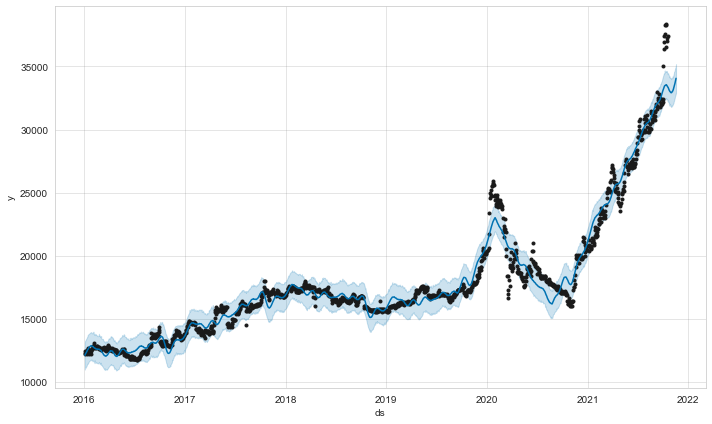

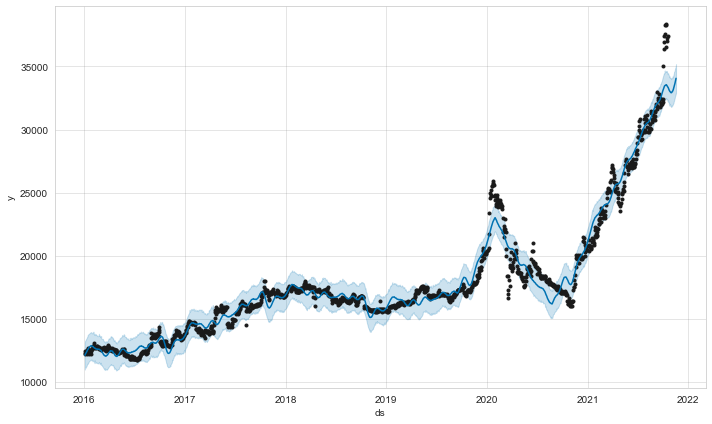

In [19]:
p_open.plot(predict_open)

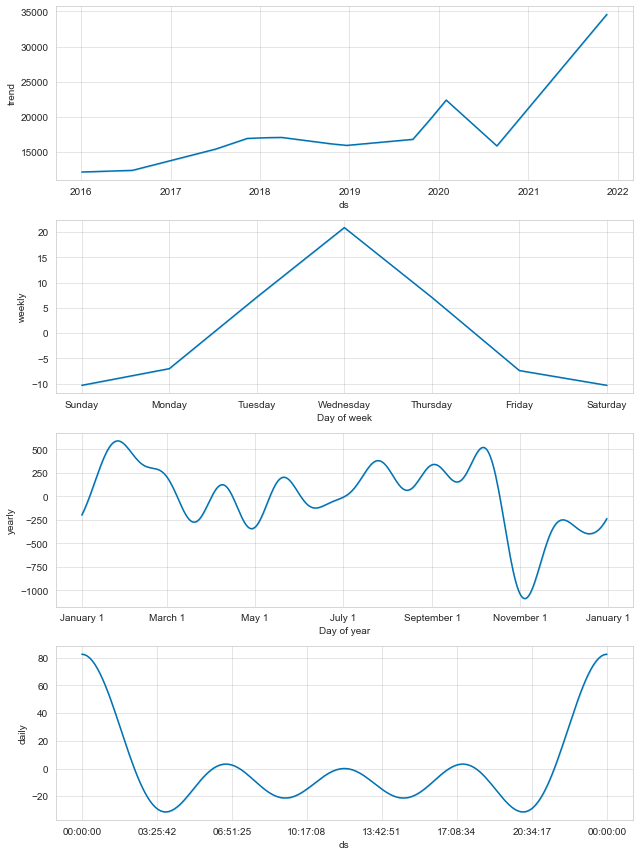

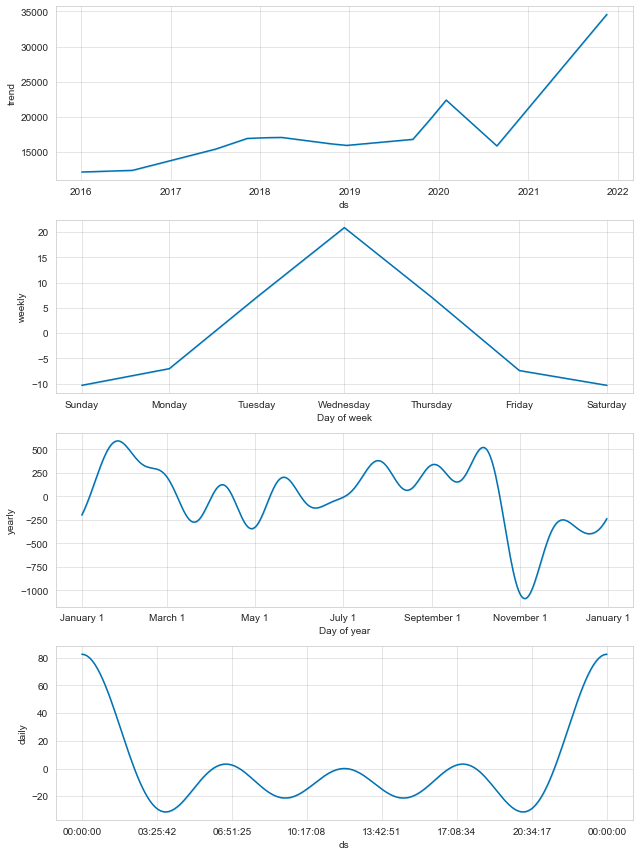

In [20]:
p_open.plot_components(predict_open)

In [21]:
data_pred=data[-predictions:]
fig = go.Figure(data=[go.Candlestick(x=data_pred['Date'],
                open=data_pred['Open'],
                high=data_pred['High'],
                low=data_pred['Low'],
                close=data_pred['Close'])])
fig.show()

In [ ]:
data_pred=data[-predictions:]
fig = go.Figure(data=[go.Candlestick(x=data_pred['Date'],
                open=data_pred['Open'],
                high=data_pred['High'],
                low=data_pred['Low'],
                close=data_pred['Close'])])
fig.show()